In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the datasets
hour_data = pd.read_csv('hour.csv')
day_data = pd.read_csv('day.csv')


In [3]:
# Aggregate the hourly data by day
hourly_grouped = hour_data.groupby('dteday').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

# Merge the aggregated hourly data with the daily data
merged_data = pd.merge(day_data, hourly_grouped, on='dteday', suffixes=('_daily', '_hourly'))
df = merged_data


## 2. Preprocesarea datelor



In [4]:
# a) Vizualizarea datelor
print("Primele 5 rânduri ale setului de date zilnic:")
print(day_data.head())

print("Primele 5 rânduri ale setului de date orar:")
print(hour_data.head())


Primele 5 rânduri ale setului de date zilnic:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  


In [5]:
# b) Vizualizarea statisticilor descriptive
print("\nStatistici descriptive pentru datele zilnice:")
print(day_data.describe())

print("\nStatistici descriptive pentru datele orare:")
print(hour_data.describe())



Statistici descriptive pentru datele zilnice:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.62

In [6]:


# c) Tratarea valorilor lipsă
print("\nValori lipsă în setul de date zilnic:")
print(day_data.isnull().sum())

print("\nValori lipsă în setul de date orar:")
print(hour_data.isnull().sum())


Valori lipsă în setul de date zilnic:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Valori lipsă în setul de date orar:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# d) Detectarea și eliminarea outlierilor folosind IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [8]:
# Aplicăm eliminarea outlierilor pe setul de date zilnic
columns_to_check = ['casual', 'registered', 'cnt']
for col in columns_to_check:
    day_data = remove_outliers(day_data, col)

# Aplicăm eliminarea outlierilor pe setul de date orar
for col in columns_to_check:
    hour_data = remove_outliers(hour_data, col)

# Verificăm dacă eliminarea outlierilor a avut efect
print("\nStatistici descriptive după eliminarea outlierilor:")
print(day_data.describe())


Statistici descriptive după eliminarea outlierilor:
          instant      season          yr        mnth     holiday     weekday  \
count  687.000000  687.000000  687.000000  687.000000  687.000000  687.000000   
mean   357.339156    2.486172    0.477438    6.512373    0.026201    2.965066   
std    212.261294    1.128493    0.499855    3.517065    0.159849    1.932219   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    173.500000    1.000000    0.000000    3.000000    0.000000    1.000000   
50%    350.000000    2.000000    0.000000    7.000000    0.000000    3.000000   
75%    543.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  687.000000  687.000000  687.000000  687.000000  687.000000  687.000000   
mean     0.726346    1.403202    0.487475    0.467232  

## 3. Elaborarea modelelor de regresie

In [9]:
# Pregătirea datelor pentru regresie
features = ['temp', 'atemp', 'hum', 'windspeed']
target = 'cnt'

X = day_data[features]
y = day_data[target]

In [10]:
# Împărțirea în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# a) Modelul de regresie liniară
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# b) Modelul k-NN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [12]:
# 4. Compararea performanțelor modelelor
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
lin_r2 = r2_score(y_test, y_pred_lin)

knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
knn_r2 = r2_score(y_test, y_pred_knn)

performance_comparison = pd.DataFrame({
    "Model": ["Regresie Liniară", "K-Nearest Neighbors"],
    "RMSE": [lin_rmse, knn_rmse],
    "R2 Score": [lin_r2, knn_r2]
})




In [13]:
# Afișăm compararea performanțelor modelelor
print(performance_comparison)

                 Model         RMSE  R2 Score
0     Regresie Liniară  1452.293246  0.416890
1  K-Nearest Neighbors  1465.474833  0.406257


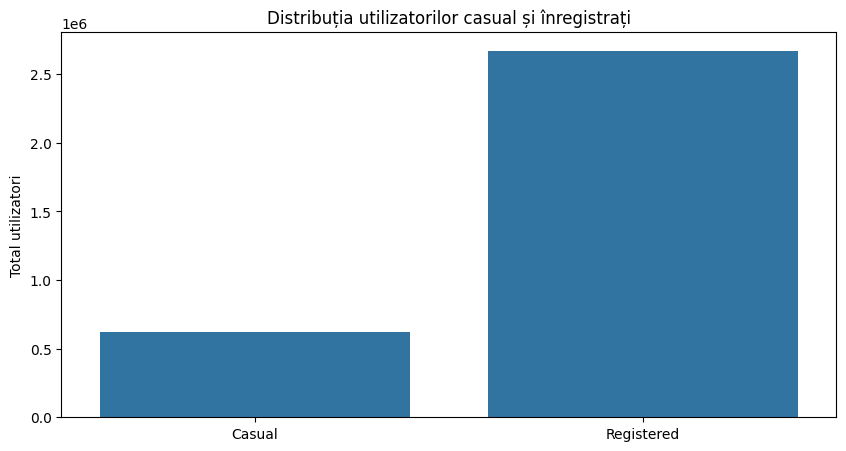

In [14]:
# Grafic pentru distribuția utilizatorilor casual și înregistrați
plt.figure(figsize=(10, 5))
sns.barplot(x=['Casual', 'Registered'], y=[df['casual_hourly'].sum(), df['registered_hourly'].sum()])
plt.title("Distribuția utilizatorilor casual și înregistrați")
plt.ylabel("Total utilizatori")
plt.show()

### Comentariu

Aceste modele nu sut chiar potrivite ptu acest dataset deoarece debalansarea dintre date este destul de semnificativa